<a href="https://colab.research.google.com/github/gayatri-bagusetty/Alogrithm-and-Analysis/blob/main/Floyd_Warshall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
nV = 4
INF = 999

def floyd(G):
  dist = list(map(lambda p: list(map(lambda q: q, p)), G))
  for r in range(nV):
    for p in range(nV):
      for q in range(nV):
        dist[p][q] = min(dist[p][q], dist[p][r] + dist[r][q])
  sol(dist)

def sol(dist):
  for p in range(nV):
    for q in range(nV):
      if dist[p][q] == INF:
        print("INF", end=" ")
      else:
        print(dist[p][q], end=" ")
    print(" ")

G = [[0,5,INF,INF],
     [50,0,15,5],
     [30,INF,0,15],
     [15,INF,5,0]]

floyd(G)

0 5 15 10  
20 0 10 5  
30 35 0 15  
15 20 5 0  


Floyd warshall with graph

Shortest distance matrix after running Floyd-Warshall:
[0, 5, 15, 10]
[20, 0, 10, 5]
[30, 35, 0, 15]
[15, 20, 5, 0]


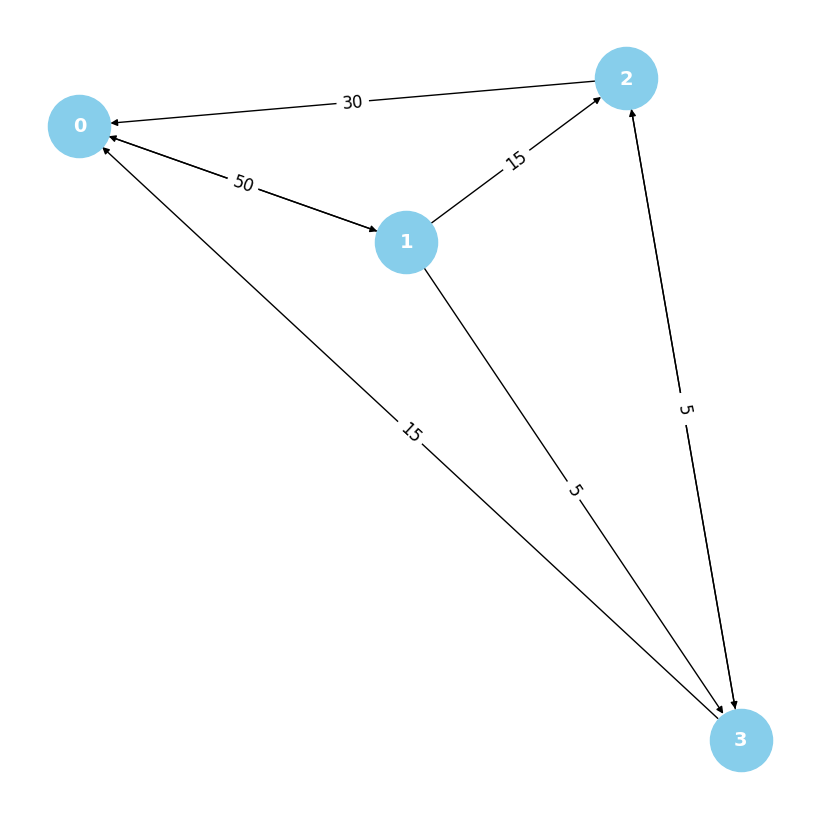

In [5]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from itertools import product

INF = 999
G = [[0,5,INF,INF],
     [50,0,15,5],
     [30,INF,0,15],
     [15,INF,5,0]]

def floyd(graph):
  n = len(graph)
  dist = np.array(graph, dtype = float)
  dist[dist == INF] = np.inf
  np.fill_diagonal(dist, 0)
  for k, i, j in product(range(n), repeat = 3):
    dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])
  return dist

def draw_graph(graph_matrix):
  G = nx.DiGraph()
  n = len(graph_matrix)
  for i in range(n):
    for j in range(n):
      if graph_matrix[i][j] != INF and i!=j:
        G.add_edge(i, j, weight = graph_matrix[i][j])
  pos = nx.spring_layout(G)
  edge_labels = nx.get_edge_attributes(G, 'weight')
  plt.figure(figsize = (8,8))
  nx.draw(G,pos,with_labels = True, node_color="skyblue", node_size = 2000, font_color="white", font_size = 14, font_weight = 'bold')
  nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_labels, font_size = 12)
  plt.show()

dist_matrix = floyd(G)

print("Shortest distance matrix after running Floyd-Warshall:")
for row in dist_matrix:
  print(["INF" if x == np.inf else int(x) for x in row])
draw_graph(G)